## Ideia:

- Cada coletor fake ter uma lista de buffers

>> Temos uma lista global chamada fake_collectors_buffers_list (geral), onde cada posição na lista é uma instância de Fake_Buffer_List, que por sua vez contém instâncias de Fake_Buffer


Basicamente temos:
```
fake_collectors_buffers_list {

    Fake_Buffer_List {
        {
            {
                LineString,
                Buffer,
                LifeSpan
            },
            {
                LineString,
                Buffer,
                LifeSpan
            },
            {
                LineString,
                Buffer,
                LifeSpan
            },

        },
        Collector_index
    },

    Fake_Buffer_List {
        {
            {
                LineString,
                Buffer,
                LifeSpan
            },
            {
                LineString,
                Buffer,
                LifeSpan
            },
            {
                LineString,
                Buffer,
                LifeSpan
            },

        },
        Collector_index
    }
}
```

## Construção da LineString



In [1]:
from shapely.geometry import Point, LineString
import math
import matplotlib.pyplot as plt

def treat_position(c, p, c_radius):
    
    result_point = []

    if p.x == c.x:
        if p.y < c.y:
            return Point(p.x, p.y - c_radius)
        else:
            return Point(p.x, p.y + c_radius)
    elif p.y == c.y:
        if p.x < c.x:
            return Point(p.x - c_radius, p.y)
        else:
            return Point(p.x + c_radius, p.y)

    slope = (p.y - c.y) / (p.x - c.x)

    if p.x < c.x:
        result_point.append(p.x - abs((math.cos(math.atan(slope)) * c_radius)))
    else:
        result_point.append(p.x + abs((math.cos(math.atan(slope)) * c_radius)))
    if p.y < c.y:
        result_point.append(p.y - abs((math.sin(math.atan(slope)) * c_radius)))
    else:
        result_point.append(p.y + abs((math.sin(math.atan(slope)) * c_radius)))
    
    return Point(result_point[0], result_point[1])

class Circle():

    def __init__(self, x, y, radius, color):
        self.x = x
        self.y = y
        self.radius = radius
        self.color = color
        self.original_radius = radius
        self.point = Point(x, y).buffer(radius)


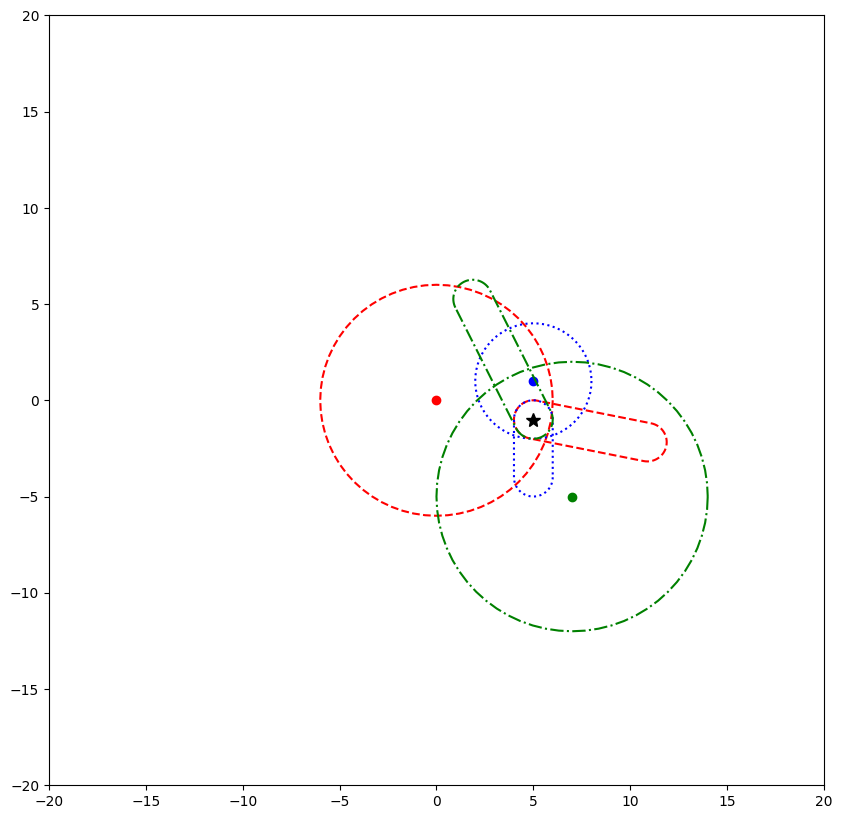

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)

c1 = Circle(0, 0, 6, 'red')
c2 = Circle(5, 1, 3, 'blue')
c3 = Circle(7, -5, 7, 'green')

circles = []

circles.append(c1)
circles.append(c2)
circles.append(c3)

p = Point(5, -1)

p_buffers = []

for circle in circles:

    if circle.point.contains(p):
        l = LineString([p, treat_position(circle.point.centroid, p, circle.original_radius)])
        p_buffers.append(l)


ax.plot(*c1.point.exterior.xy, color=c1.color, linestyle='--')
ax.plot(*c1.point.centroid.xy, color=c1.color, marker='o')

ax.plot(*c2.point.exterior.xy, color=c2.color, linestyle=':')
ax.plot(*c2.point.centroid.xy, color=c2.color, marker='o')

ax.plot(*c3.point.exterior.xy, color=c3.color, linestyle='-.')
ax.plot(*c3.point.centroid.xy, color=c3.color, marker='o')

ax.plot(*p.xy, color='black', marker='*', markersize=10)

p_buffers[0] = p_buffers[0].buffer(1)
p_buffers[1] = p_buffers[1].buffer(1)
p_buffers[2] = p_buffers[2].buffer(1)

result_buffer = p_buffers[0].union(p_buffers[1])
result_buffer = result_buffer.union(p_buffers[2])
result_buffer = result_buffer.buffer(1)

x0, y0 = p_buffers[0].exterior.xy
x1, y1 = p_buffers[1].exterior.xy
x2, y2 = p_buffers[2].exterior.xy

ax.plot(x0, y0, color='red', linestyle='--')
ax.plot(x1, y1, color='blue', linestyle=':')    
ax.plot(x2, y2, color='green', linestyle='-.')

# ax.plot(*result_buffer.exterior.xy, color='brown')


### Parâmetros que usei

- Buffer de start: 0.0001 (estimado)
- Tamanho inicial do buffer (comprimento): rai (raio de abrangência imediato definido na última versão do Jupyter Notebook) = 0.08

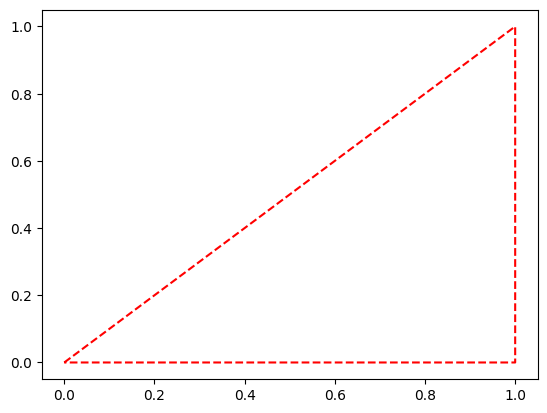

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Create a polygon object
poly = Polygon([(0, 0), (1, 1), (1, 0)])

# Extract x and y coordinates of the polygon exterior
x, y = poly.exterior.xy

# Create a plot
fig, ax = plt.subplots()

# Plot the polygon with a red dashed line style
ax.plot(x, y, linestyle='--', color='red')

# Show the plot
plt.show()
